# JuxtBoard User Study

## Imports

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

## Helper Functions

In [2]:
def print_stats(data):
    print('--- Statistics ----')
    display(data.describe())
    print('--- Counting Unique Values ----')
    display(data.value_counts())
    print('--- Basic Histogram ----')
    data.hist()
    plt.show()
    
def calculate_sus(data):
    for i in range(len(data.columns)):
        if i % 2:
            data.iloc[:,i] = 7 - data.iloc[:,i]
        else:
            data.iloc[:,i] = data.iloc[:,i] - 1

    data['Score'] = data.iloc[:,0:10].sum(axis=1)
    data['Score 100'] = data['Score'] * (100/60)
    return data
    

## Load Excel

In [3]:
data = pd.read_excel('data/juxtboard/questionnaire-responses.xlsx', sheet_name=None)  

## Basic Data

In [4]:
data_basic = data['Basic']

# Translating Genre from Portuguese to English
data_basic['Genre'].replace('Masculino','Male',inplace=True)
data_basic['Genre'].replace('Feminino','Female',inplace=True)
data_basic['Genre'].replace('Prefiro não responder','Prefer not to say',inplace=True)

# Translating Education from Portuguese to English
data_basic['Education'].replace('Educação Básica','Basic Education',inplace=True)
data_basic['Education'].replace('Educação Secundária','Secondary Education',inplace=True)
data_basic['Education'].replace('Educação Pós-Secundária','Post-Secondary Education',inplace=True)
data_basic['Education'].replace('Educação Pós-Secundária','Post-Secondary Education',inplace=True)
data_basic['Education'].replace('Licenciatura','Bachelor\'s Degree',inplace=True)
data_basic['Education'].replace('Mestrado','Master\'s Degree',inplace=True)
data_basic['Education'].replace('Doutoramento','Doctoral Degree',inplace=True)
data_basic['Education'].replace('Prefiro não responder','Prefer not to say',inplace=True)

# Translating Type of Devices from Portuguese to English
data_basic['Type of Devices'].replace({'Computador de secretária':'Desktop'}, regex=True ,inplace=True)
data_basic['Type of Devices'].replace({'Computador portátil':'Laptop'}, regex=True, inplace=True)

# Translating Test mode from Portuguese to English
data_basic['Test Mode'].replace('PRIMEIRO em modo "Multi-Dispositivo" e DEPOIS em modo "Dispositivo Único".','Single Device > Multi-Device',inplace=True)
data_basic['Test Mode'].replace('PRIMEIRO em modo "Dispositivo Único" e DEPOIS em modo "Multi-Disposito".','Multi-Device > Single Device',inplace=True)

display(data_basic)

,Age,Genre,Education,Type of Devices,Number of Devices,Usage of Multiple-Devices,Test Mode
0,51,Male,Bachelor's Degree,"Laptop, Smartphone",2,6,Multi-Device > Single Device
1,26,Male,Post-Secondary Education,"Desktop, Laptop, Smartphone",3,7,Single Device > Multi-Device


### Age

--- Statistics ----


count     2.00000
mean     38.50000
std      17.67767
min      26.00000
25%      32.25000
50%      38.50000
75%      44.75000
max      51.00000
Name: Age, dtype: float64

--- Counting Unique Values ----


26    1
51    1
Name: Age, dtype: int64

--- Basic Histogram ----


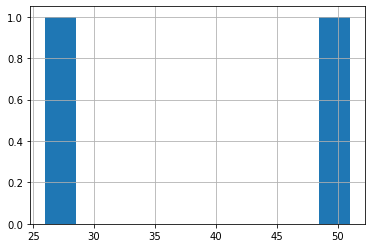

In [5]:
data_basic_age = data_basic['Age']
print_stats(data_basic_age)

### Genre

--- Statistics ----


count        2
unique       1
top       Male
freq         2
Name: Genre, dtype: object

--- Counting Unique Values ----


Male    2
Name: Genre, dtype: int64

--- Basic Histogram ----


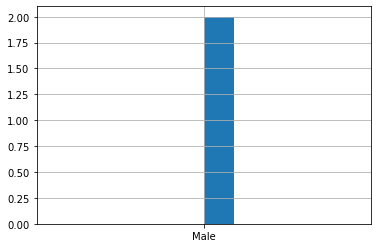

In [6]:
data_basic_genre = data_basic['Genre']
print_stats(data_basic_genre)

### Education

--- Statistics ----


count                     2
unique                    2
top       Bachelor's Degree
freq                      1
Name: Education, dtype: object

--- Counting Unique Values ----


Bachelor's Degree           1
Post-Secondary Education    1
Name: Education, dtype: int64

--- Basic Histogram ----


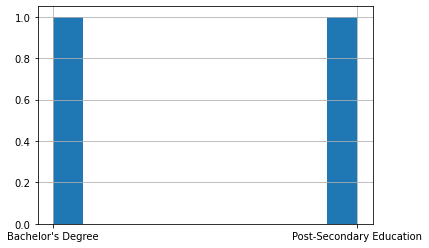

In [7]:
data_basic_education = data_basic['Education']
print_stats(data_basic_education)

### Type of Devices

--- Statistics ----


count                                 2
unique                                2
top       [Desktop, Laptop, Smartphone]
freq                                  1
Name: Type of Devices, dtype: object

--- Basic Histogram ----


<AxesSubplot:>

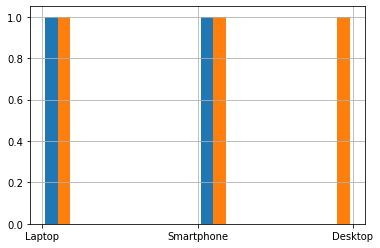

In [8]:
data_basic_type_of_devices = data_basic['Type of Devices'].map(lambda x: [i.strip() for i in x.split(",")])
print('--- Statistics ----')
display(data_basic_type_of_devices.describe())
print('--- Basic Histogram ----')
data_basic_type_of_devices.hist()

--- Statistics ----


count    2.000000
mean     2.500000
std      0.707107
min      2.000000
25%      2.250000
50%      2.500000
75%      2.750000
max      3.000000
Name: Type of Devices, dtype: float64

--- Counting Unique Values ----


2    1
3    1
Name: Type of Devices, dtype: int64

--- Basic Histogram ----


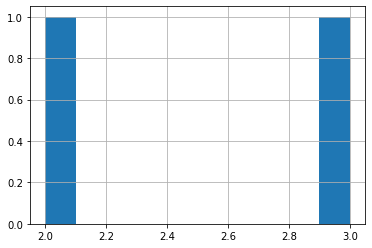

In [9]:
data_number_of_devices = data_basic_type_of_devices.apply(len)
print_stats(data_number_of_devices)

--- Statistics ----


count    2.000000
mean     6.500000
std      0.707107
min      6.000000
25%      6.250000
50%      6.500000
75%      6.750000
max      7.000000
Name: Usage of Multiple-Devices, dtype: float64

--- Counting Unique Values ----


6    1
7    1
Name: Usage of Multiple-Devices, dtype: int64

--- Basic Histogram ----


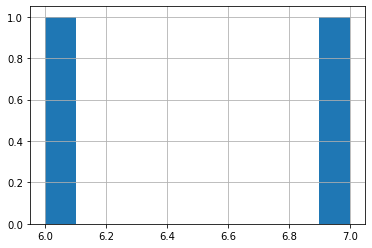

In [10]:
data_basic_education = data_basic['Usage of Multiple-Devices']
print_stats(data_basic_education)

--- Statistics ----


count                                2
unique                               2
top       Multi-Device > Single Device
freq                                 1
Name: Test Mode, dtype: object

--- Counting Unique Values ----


Multi-Device > Single Device    1
Single Device > Multi-Device    1
Name: Test Mode, dtype: int64

--- Basic Histogram ----


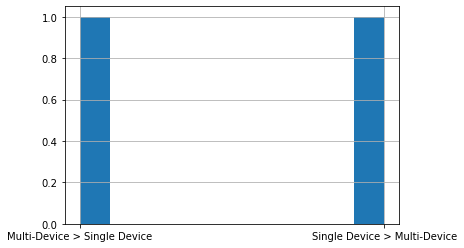

In [11]:
data_basic_education = data_basic['Test Mode']
print_stats(data_basic_education)

## SUS - Single Device Mode

In [12]:
data_sus_single_device = calculate_sus(data['SUS Single Device'].copy().dropna())
data_sus_single_device

,SUS1,SUS2,SUS3,SUS4,SUS5,SUS6,SUS7,SUS8,SUS9,SUS10,Score,Score 100
0,6.0,6.0,5.0,6.0,5.0,5.0,5.0,6.0,5.0,6.0,55.0,91.666667
1,2.0,6.0,6.0,6.0,4.0,6.0,4.0,6.0,5.0,6.0,51.0,85.000000


#### General Stats

--- Statistics ----


,SUS1,SUS2,SUS3,SUS4,SUS5,SUS6,SUS7,SUS8,SUS9,SUS10,Score,Score 100
count,2.000000,2.0,2.000000,2.0,2.000000,2.000000,2.000000,2.0,2.0,2.0,2.000000,2.000000
mean,4.000000,6.0,5.500000,6.0,4.500000,5.500000,4.500000,6.0,5.0,6.0,53.000000,88.333333
std,2.828427,0.0,0.707107,0.0,0.707107,0.707107,0.707107,0.0,0.0,0.0,2.828427,4.714045
min,2.000000,6.0,5.000000,6.0,4.000000,5.000000,4.000000,6.0,5.0,6.0,51.000000,85.000000
25%,3.000000,6.0,5.250000,6.0,4.250000,5.250000,4.250000,6.0,5.0,6.0,52.000000,86.666667
50%,4.000000,6.0,5.500000,6.0,4.500000,5.500000,4.500000,6.0,5.0,6.0,53.000000,88.333333
75%,5.000000,6.0,5.750000,6.0,4.750000,5.750000,4.750000,6.0,5.0,6.0,54.000000,90.000000
max,6.000000,6.0,6.000000,6.0,5.000000,6.000000,5.000000,6.0,5.0,6.0,55.000000,91.666667


--- Counting Unique Values ----


SUS1  SUS2  SUS3  SUS4  SUS5  SUS6  SUS7  SUS8  SUS9  SUS10  Score  Score 100
2.0   6.0   6.0   6.0   4.0   6.0   4.0   6.0   5.0   6.0    51.0   85.000000    1
6.0   6.0   5.0   6.0   5.0   5.0   5.0   6.0   5.0   6.0    55.0   91.666667    1
dtype: int64

--- Basic Histogram ----


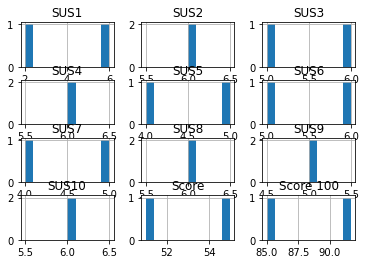

In [13]:
print_stats(data_sus_single_device)

#### Per-question Stats

--- Statistics ----


count    2.000000
mean     4.000000
std      2.828427
min      2.000000
25%      3.000000
50%      4.000000
75%      5.000000
max      6.000000
Name: SUS1, dtype: float64

--- Counting Unique Values ----


6.0    1
2.0    1
Name: SUS1, dtype: int64

--- Basic Histogram ----


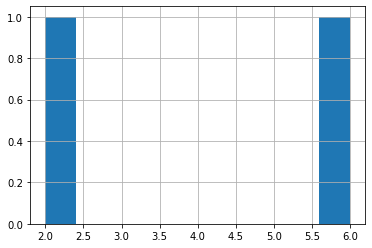

--- Statistics ----


count    2.0
mean     6.0
std      0.0
min      6.0
25%      6.0
50%      6.0
75%      6.0
max      6.0
Name: SUS2, dtype: float64

--- Counting Unique Values ----


6.0    2
Name: SUS2, dtype: int64

--- Basic Histogram ----


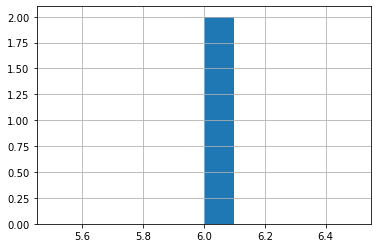

--- Statistics ----


count    2.000000
mean     5.500000
std      0.707107
min      5.000000
25%      5.250000
50%      5.500000
75%      5.750000
max      6.000000
Name: SUS3, dtype: float64

--- Counting Unique Values ----


5.0    1
6.0    1
Name: SUS3, dtype: int64

--- Basic Histogram ----


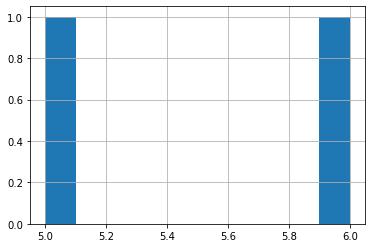

--- Statistics ----


count    2.0
mean     6.0
std      0.0
min      6.0
25%      6.0
50%      6.0
75%      6.0
max      6.0
Name: SUS4, dtype: float64

--- Counting Unique Values ----


6.0    2
Name: SUS4, dtype: int64

--- Basic Histogram ----


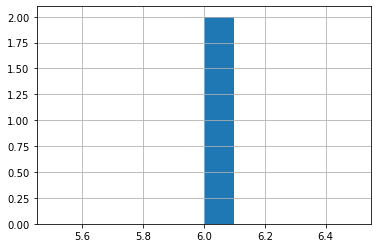

--- Statistics ----


count    2.000000
mean     4.500000
std      0.707107
min      4.000000
25%      4.250000
50%      4.500000
75%      4.750000
max      5.000000
Name: SUS5, dtype: float64

--- Counting Unique Values ----


5.0    1
4.0    1
Name: SUS5, dtype: int64

--- Basic Histogram ----


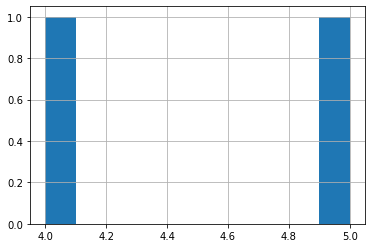

--- Statistics ----


count    2.000000
mean     5.500000
std      0.707107
min      5.000000
25%      5.250000
50%      5.500000
75%      5.750000
max      6.000000
Name: SUS6, dtype: float64

--- Counting Unique Values ----


5.0    1
6.0    1
Name: SUS6, dtype: int64

--- Basic Histogram ----


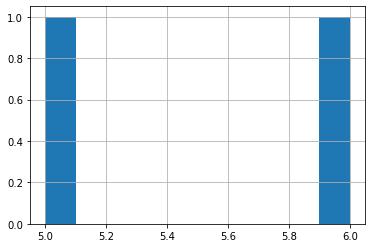

--- Statistics ----


count    2.000000
mean     4.500000
std      0.707107
min      4.000000
25%      4.250000
50%      4.500000
75%      4.750000
max      5.000000
Name: SUS7, dtype: float64

--- Counting Unique Values ----


5.0    1
4.0    1
Name: SUS7, dtype: int64

--- Basic Histogram ----


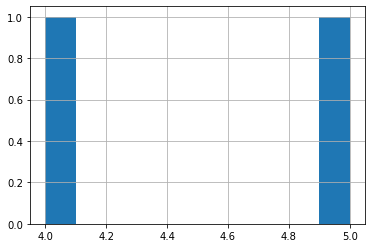

--- Statistics ----


count    2.0
mean     6.0
std      0.0
min      6.0
25%      6.0
50%      6.0
75%      6.0
max      6.0
Name: SUS8, dtype: float64

--- Counting Unique Values ----


6.0    2
Name: SUS8, dtype: int64

--- Basic Histogram ----


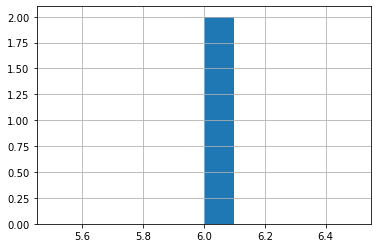

--- Statistics ----


count    2.0
mean     5.0
std      0.0
min      5.0
25%      5.0
50%      5.0
75%      5.0
max      5.0
Name: SUS9, dtype: float64

--- Counting Unique Values ----


5.0    2
Name: SUS9, dtype: int64

--- Basic Histogram ----


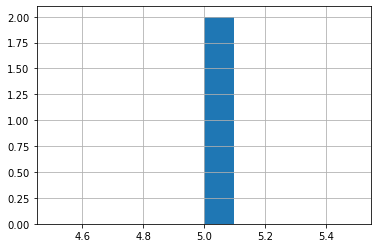

--- Statistics ----


count    2.0
mean     6.0
std      0.0
min      6.0
25%      6.0
50%      6.0
75%      6.0
max      6.0
Name: SUS10, dtype: float64

--- Counting Unique Values ----


6.0    2
Name: SUS10, dtype: int64

--- Basic Histogram ----


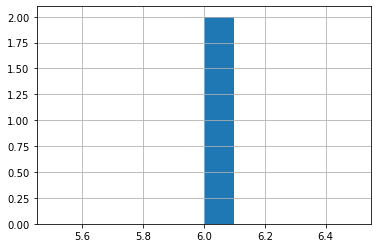

--- Statistics ----


count     2.000000
mean     53.000000
std       2.828427
min      51.000000
25%      52.000000
50%      53.000000
75%      54.000000
max      55.000000
Name: Score, dtype: float64

--- Counting Unique Values ----


51.0    1
55.0    1
Name: Score, dtype: int64

--- Basic Histogram ----


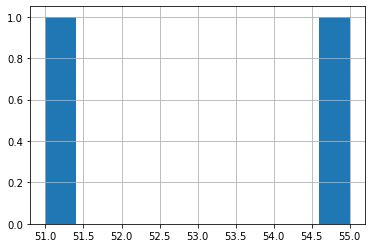

--- Statistics ----


count     2.000000
mean     88.333333
std       4.714045
min      85.000000
25%      86.666667
50%      88.333333
75%      90.000000
max      91.666667
Name: Score 100, dtype: float64

--- Counting Unique Values ----


85.000000    1
91.666667    1
Name: Score 100, dtype: int64

--- Basic Histogram ----


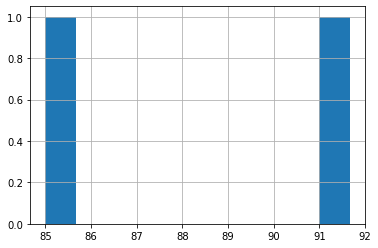

In [14]:
for column in data_sus_single_device:
    print_stats(data_sus_single_device[column])

## SUS - Multi-Device Mode

In [15]:
data_sus_multi_device = calculate_sus(data['SUS Multi-Device'].copy().dropna())
data_sus_multi_device

,SUS1,SUS2,SUS3,SUS4,SUS5,SUS6,SUS7,SUS8,SUS9,SUS10,Score,Score 100
0,5.0,5.0,6.0,6.0,5.0,5.0,5.0,6.0,5.0,6.0,54.0,90.000000
1,2.0,6.0,6.0,6.0,3.0,5.0,5.0,6.0,5.0,6.0,50.0,83.333333


#### General Stats

--- Statistics ----


,SUS1,SUS2,SUS3,SUS4,SUS5,SUS6,SUS7,SUS8,SUS9,SUS10,Score,Score 100
count,2.00000,2.000000,2.0,2.0,2.000000,2.0,2.0,2.0,2.0,2.0,2.000000,2.000000
mean,3.50000,5.500000,6.0,6.0,4.000000,5.0,5.0,6.0,5.0,6.0,52.000000,86.666667
std,2.12132,0.707107,0.0,0.0,1.414214,0.0,0.0,0.0,0.0,0.0,2.828427,4.714045
min,2.00000,5.000000,6.0,6.0,3.000000,5.0,5.0,6.0,5.0,6.0,50.000000,83.333333
25%,2.75000,5.250000,6.0,6.0,3.500000,5.0,5.0,6.0,5.0,6.0,51.000000,85.000000
50%,3.50000,5.500000,6.0,6.0,4.000000,5.0,5.0,6.0,5.0,6.0,52.000000,86.666667
75%,4.25000,5.750000,6.0,6.0,4.500000,5.0,5.0,6.0,5.0,6.0,53.000000,88.333333
max,5.00000,6.000000,6.0,6.0,5.000000,5.0,5.0,6.0,5.0,6.0,54.000000,90.000000


--- Counting Unique Values ----


SUS1  SUS2  SUS3  SUS4  SUS5  SUS6  SUS7  SUS8  SUS9  SUS10  Score  Score 100
2.0   6.0   6.0   6.0   3.0   5.0   5.0   6.0   5.0   6.0    50.0   83.333333    1
5.0   5.0   6.0   6.0   5.0   5.0   5.0   6.0   5.0   6.0    54.0   90.000000    1
dtype: int64

--- Basic Histogram ----


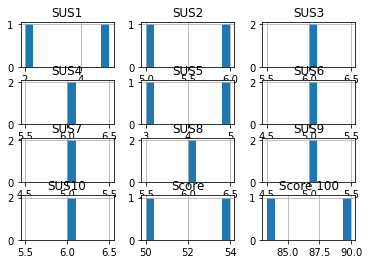

In [16]:
print_stats(data_sus_multi_device)

#### Per-question Stats

--- Statistics ----


count    2.00000
mean     3.50000
std      2.12132
min      2.00000
25%      2.75000
50%      3.50000
75%      4.25000
max      5.00000
Name: SUS1, dtype: float64

--- Counting Unique Values ----


5.0    1
2.0    1
Name: SUS1, dtype: int64

--- Basic Histogram ----


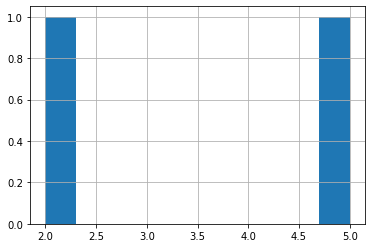

--- Statistics ----


count    2.000000
mean     5.500000
std      0.707107
min      5.000000
25%      5.250000
50%      5.500000
75%      5.750000
max      6.000000
Name: SUS2, dtype: float64

--- Counting Unique Values ----


5.0    1
6.0    1
Name: SUS2, dtype: int64

--- Basic Histogram ----


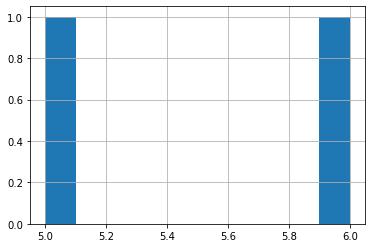

--- Statistics ----


count    2.0
mean     6.0
std      0.0
min      6.0
25%      6.0
50%      6.0
75%      6.0
max      6.0
Name: SUS3, dtype: float64

--- Counting Unique Values ----


6.0    2
Name: SUS3, dtype: int64

--- Basic Histogram ----


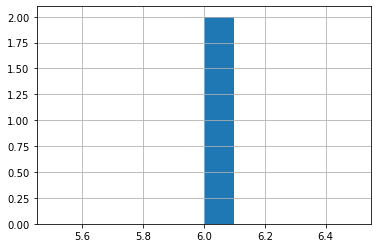

--- Statistics ----


count    2.0
mean     6.0
std      0.0
min      6.0
25%      6.0
50%      6.0
75%      6.0
max      6.0
Name: SUS4, dtype: float64

--- Counting Unique Values ----


6.0    2
Name: SUS4, dtype: int64

--- Basic Histogram ----


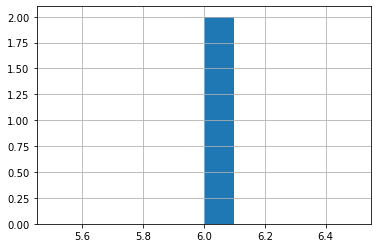

--- Statistics ----


count    2.000000
mean     4.000000
std      1.414214
min      3.000000
25%      3.500000
50%      4.000000
75%      4.500000
max      5.000000
Name: SUS5, dtype: float64

--- Counting Unique Values ----


5.0    1
3.0    1
Name: SUS5, dtype: int64

--- Basic Histogram ----


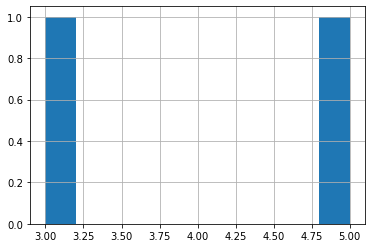

--- Statistics ----


count    2.0
mean     5.0
std      0.0
min      5.0
25%      5.0
50%      5.0
75%      5.0
max      5.0
Name: SUS6, dtype: float64

--- Counting Unique Values ----


5.0    2
Name: SUS6, dtype: int64

--- Basic Histogram ----


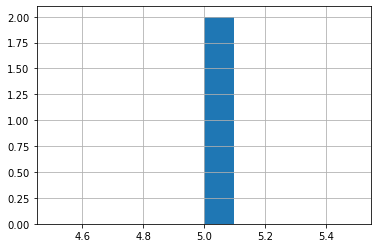

--- Statistics ----


count    2.0
mean     5.0
std      0.0
min      5.0
25%      5.0
50%      5.0
75%      5.0
max      5.0
Name: SUS7, dtype: float64

--- Counting Unique Values ----


5.0    2
Name: SUS7, dtype: int64

--- Basic Histogram ----


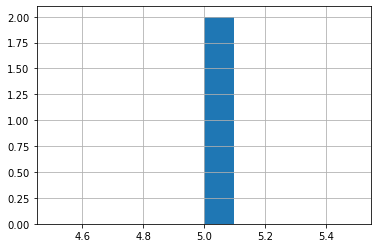

--- Statistics ----


count    2.0
mean     6.0
std      0.0
min      6.0
25%      6.0
50%      6.0
75%      6.0
max      6.0
Name: SUS8, dtype: float64

--- Counting Unique Values ----


6.0    2
Name: SUS8, dtype: int64

--- Basic Histogram ----


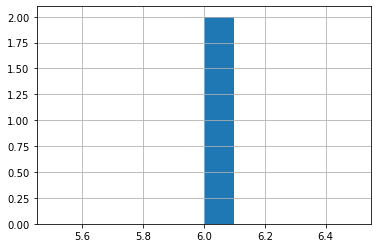

--- Statistics ----


count    2.0
mean     5.0
std      0.0
min      5.0
25%      5.0
50%      5.0
75%      5.0
max      5.0
Name: SUS9, dtype: float64

--- Counting Unique Values ----


5.0    2
Name: SUS9, dtype: int64

--- Basic Histogram ----


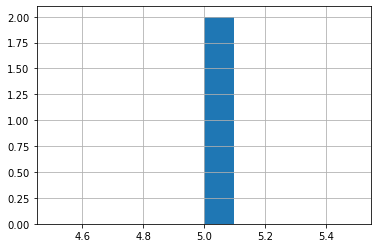

--- Statistics ----


count    2.0
mean     6.0
std      0.0
min      6.0
25%      6.0
50%      6.0
75%      6.0
max      6.0
Name: SUS10, dtype: float64

--- Counting Unique Values ----


6.0    2
Name: SUS10, dtype: int64

--- Basic Histogram ----


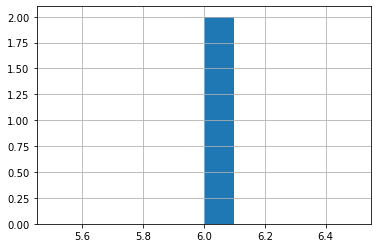

--- Statistics ----


count     2.000000
mean     52.000000
std       2.828427
min      50.000000
25%      51.000000
50%      52.000000
75%      53.000000
max      54.000000
Name: Score, dtype: float64

--- Counting Unique Values ----


54.0    1
50.0    1
Name: Score, dtype: int64

--- Basic Histogram ----


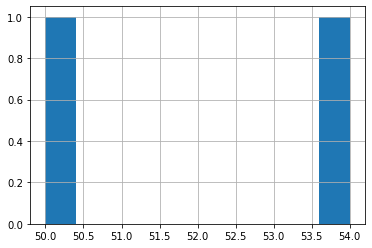

--- Statistics ----


count     2.000000
mean     86.666667
std       4.714045
min      83.333333
25%      85.000000
50%      86.666667
75%      88.333333
max      90.000000
Name: Score 100, dtype: float64

--- Counting Unique Values ----


83.333333    1
90.000000    1
Name: Score 100, dtype: int64

--- Basic Histogram ----


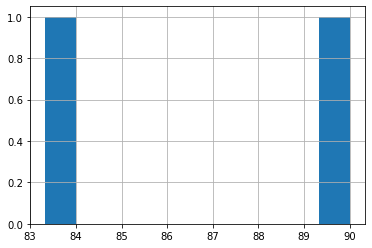

In [17]:
for column in data_sus_multi_device:
    print_stats(data_sus_multi_device[column])

## SUS Single Device vs. SUS Multi-Device

### Dependent t-test for paired samples

In [18]:
stats.ttest_rel(data_sus_single_device['Score 100'],data_sus_multi_device['Score 100'])

Ttest_relResult(statistic=234562480592213.0, pvalue=2.7140733281822047e-15)

### Single Device vs. SUS Multi-Device

In [19]:
data_sd_md = data['SD vs. MD'].copy().dropna()
data_sd_md.iloc[:,0:5] = data_sd_md.iloc[:,0:5] - 4
data_sd_md

,SDMD1,SDMD2,SDMD3,SDMD4,SDMD5
0,1.0,0.0,0.0,-1.0,0.0
1,0.0,1.0,-1.0,0.0,-1.0


--- Statistics ----


,SDMD1,SDMD2,SDMD3,SDMD4,SDMD5
count,2.000000,2.000000,2.000000,2.000000,2.000000
mean,0.500000,0.500000,-0.500000,-0.500000,-0.500000
std,0.707107,0.707107,0.707107,0.707107,0.707107
min,0.000000,0.000000,-1.000000,-1.000000,-1.000000
25%,0.250000,0.250000,-0.750000,-0.750000,-0.750000
50%,0.500000,0.500000,-0.500000,-0.500000,-0.500000
75%,0.750000,0.750000,-0.250000,-0.250000,-0.250000
max,1.000000,1.000000,0.000000,0.000000,0.000000


--- Counting Unique Values ----


SDMD1  SDMD2  SDMD3  SDMD4  SDMD5
0.0    1.0    -1.0    0.0   -1.0     1
1.0    0.0     0.0   -1.0    0.0     1
dtype: int64

--- Basic Histogram ----


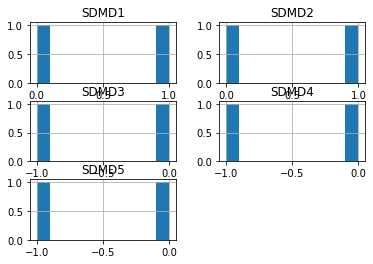

In [20]:
print_stats(data_sd_md)

## General Use

In [21]:
data_general_use = data['General Use'].copy().dropna()
data_general_use['Score'] = data_general_use.iloc[:,0:5].sum(axis=1)
data_general_use['Score 100'] = data_general_use['Score'] * (100/35)
data_general_use

,GU1,GU2,GU3,GU4,GU5,Score,Score 100
0,6.0,7.0,6.0,6.0,6.0,31.0,88.571429
1,7.0,5.0,7.0,3.0,4.0,26.0,74.285714


--- Statistics ----


count     2.000000
mean     81.428571
std      10.101525
min      74.285714
25%      77.857143
50%      81.428571
75%      85.000000
max      88.571429
Name: Score 100, dtype: float64

--- Counting Unique Values ----


74.285714    1
88.571429    1
Name: Score 100, dtype: int64

--- Basic Histogram ----


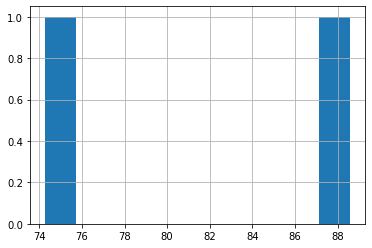

In [22]:
print_stats(data_general_use['Score 100'])